In [4]:
import pandas as pd
from datetime import datetime

## Modifying Data

### Cleansing Raw Indonesian Rice Price Data to form per Year Dataset

In [5]:
def cleansing(data_num: int):
    data = pd.read_excel('raw-data/Rata-Rata Harga Beras Bulanan di Tingkat Penggilingan Menurut Kualitas (' + str(data_num) + ').xlsx')
    year = data.iat[0, 1]
    data = data.iloc[2:5, 1:13]
    data.columns = [ datetime.strptime(str(i) + '-' + year, '%m-%Y').date() for i in range(1, 13)]
    data = data.T
    data.columns = ['premium', 'medium', 'bad']
    data = data.replace('-','0')
    data.to_csv('clean-data/rice_quality_indo_' + year + '.csv')

In [6]:
for i in range(1, 11):
    cleansing(i)

### Create Dataset with a Variety Range of the Years

In [7]:
def concatByYear(from_year: int, to_year: int):
    listData = []

    for i in range(from_year, to_year+1):
        listData.append(pd.read_csv('clean-data/rice_quality_indo_' + str(i) + '.csv', index_col = 0))
    
    data = pd.concat(listData)
    data.to_csv('clean-data/rice_quality_indo_' + str(from_year) + '-' + str(to_year) + '.csv')
    return data.head(), data.tail()

In [8]:
concatByYear(2013,2016)
concatByYear(2013,2019)
concatByYear(2016,2019)
concatByYear(2017,2019)
concatByYear(2020,2022)

(             premium   medium      bad
 2020-01-01  10032.66  9805.40  9518.85
 2020-02-01  10080.80  9844.13  9521.95
 2020-03-01  10082.43  9826.68  9460.76
 2020-04-01  10018.19  9671.03  8989.00
 2020-05-01   9826.63  9526.55  8972.52,
              premium    medium      bad
 2022-08-01   9901.15   9358.34  9069.27
 2022-09-01  10252.31   9785.04  9465.63
 2022-10-01  10402.23  10043.47  9516.09
 2022-11-01  10511.71  10122.15  9542.12
 2022-12-01      0.00      0.00     0.00)

## Visualizing Data

In [9]:
def viewChart(from_year: int, to_year: int = 0):
    year = str(from_year)
    if to_year != 0:
        year = str(from_year) + '-' + str(to_year)
    try:
        data = pd.read_csv('clean-data/rice_quality_indo_' + year + '.csv', index_col = 0)
    except:
        concatByYear(from_year, to_year)
        data = pd.read_csv('clean-data/rice_quality_indo_' + year + '.csv', index_col = 0)
    return data.plot()


<AxesSubplot: >

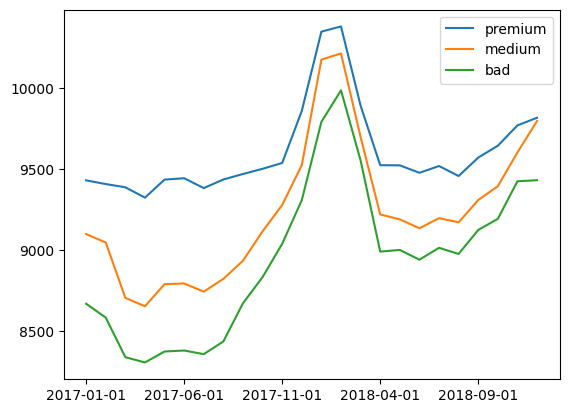

In [10]:
viewChart(2017,2018)